### 计算新闻传播学课程

***
***

# rpy2: Using R within Jupyter Notebook

***
***

王成军

wangchengjun@nju.edu.cn

计算传播网 http://computational-communication.com

> pip install rpy2

In [1]:
%load_ext rpy2.ipython 

# Rpush: push Python object to R

In [2]:
import numpy as np
X = np.array([4.5,6.3,7.9, 10.3])
%Rpush X
%R mean(X)

array([ 7.25])

In [3]:
%%R
Y = c(2,4,3,9)
summary(lm(Y~X))


Call:
lm(formula = Y ~ X)

Residuals:
      1       2       3       4 
 0.5388  0.5498 -2.2183  1.1297 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)   -3.511      3.265  -1.076    0.395
X              1.105      0.432   2.558    0.125

Residual standard error: 1.842 on 2 degrees of freedom
Multiple R-squared:  0.7659,	Adjusted R-squared:  0.6488 
F-statistic: 6.543 on 1 and 2 DF,  p-value: 0.1249



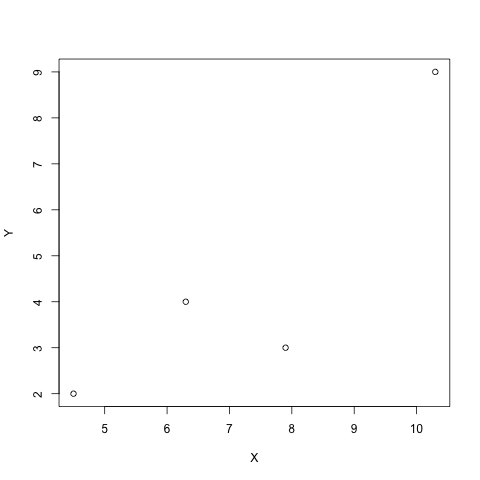

In [4]:
%R plot(X, Y)

In [5]:
%R dat = data.frame(X, Y)

,X,Y
1,4.5,2.0
2,6.3,4.0
3,7.9,3.0
4,10.3,9.0


# Rpull: pull data from R to python

In [10]:
%Rpull dat

In [11]:
dat

,X,Y
1,4.5,2
2,6.3,4
3,7.9,3
4,10.3,9


In [24]:
dat['X']

1     4.5
2     6.3
3     7.9
4    10.3
Name: X, dtype: float64

In [12]:
import rpy2.interactive as r
import rpy2.interactive.packages # this can take few seconds
r.packages.importr('ggplot2')

rpy2.robjects.packages.Package as a <module 'ggplot2' (built-in)>

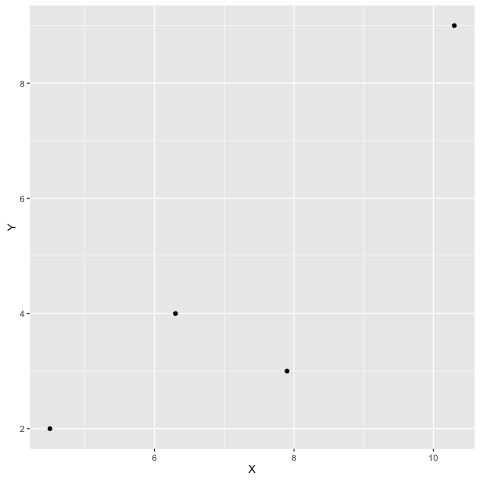

In [13]:
%%R 
p = ggplot(data = dat, mapping = aes(x = X, y =Y))
p + geom_point()

/Users/chengjun/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: The following object is masked from package:ggplot2:

    mpg


  res = super(Function, self).__call__(*new_args, **new_kwargs)


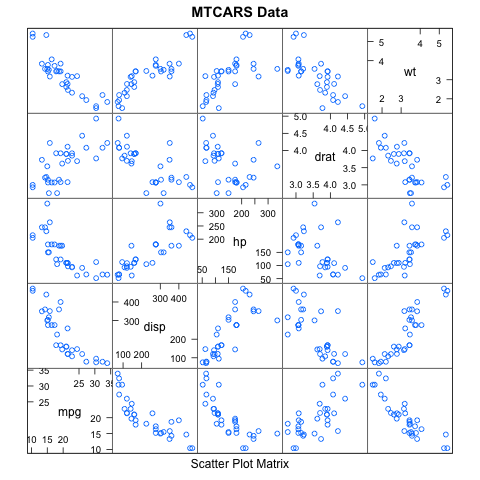

In [14]:
%%R
library(lattice)
attach(mtcars)

# scatterplot matrix
splom(mtcars[c(1,3,4,5,6)], main="MTCARS Data")

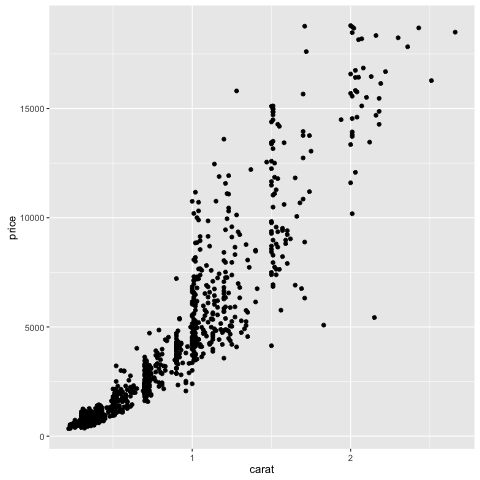

In [15]:
%%R
data(diamonds) 
set.seed(42) 
small = diamonds[sample(nrow(diamonds), 1000), ] 
head(small)

p = ggplot(data = small, mapping = aes(x = carat, y = price))
p + geom_point()

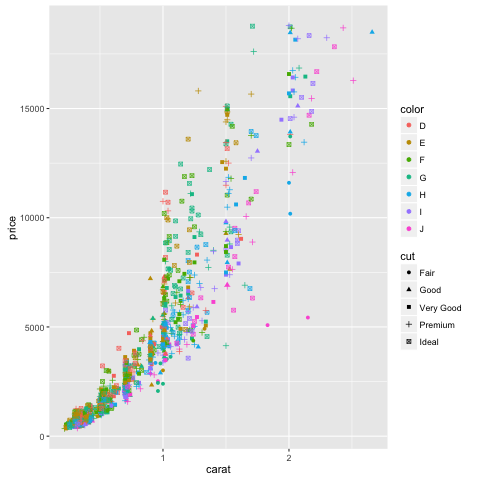

In [16]:
%%R 
p = ggplot(data=small, mapping=aes(x=carat, y=price, shape=cut, colour=color)) 
p+geom_point()

In [17]:
import rpy2.robjects as ro
from rpy2.robjects.packages import importr

base = importr('base')

fit_full = ro.r("lm('mpg ~ wt + cyl', data=mtcars)")
print(base.summary(fit_full))


Call:
lm(formula = "mpg ~ wt + cyl", data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.2893 -1.5512 -0.4684  1.5743  6.1004 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  39.6863     1.7150  23.141  < 2e-16 ***
wt           -3.1910     0.7569  -4.216 0.000222 ***
cyl          -1.5078     0.4147  -3.636 0.001064 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.568 on 29 degrees of freedom
Multiple R-squared:  0.8302,	Adjusted R-squared:  0.8185 
F-statistic: 70.91 on 2 and 29 DF,  p-value: 6.809e-12




In [18]:
diamonds = ro.r("data(diamonds)")

In [19]:
%R head(diamonds)

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,5,2,2,61.5,55,326,3.95,3.98,2.43
2,0.21,4,2,3,59.8,61,326,3.89,3.84,2.31
3,0.23,2,2,5,56.9,65,327,4.05,4.07,2.31
4,0.29,4,6,4,62.4,58,334,4.20,4.23,2.63
5,0.31,2,7,2,63.3,58,335,4.34,4.35,2.75
6,0.24,3,7,6,62.8,57,336,3.94,3.96,2.48


In [21]:
fit_dia = ro.r("lm('price ~ carat + cut + color + clarity + depth', data=diamonds)")

In [22]:
print(base.summary(fit_dia))


Call:
lm(formula = "price ~ carat + cut + color + clarity + depth", 
    data = diamonds)

Residuals:
     Min       1Q   Median       3Q      Max 
-16805.0   -680.3   -197.9    466.2  10393.4 

Coefficients:
             Estimate Std. Error  t value Pr(>|t|)    
(Intercept) -3264.660    232.513  -14.041  < 2e-16 ***
carat        8885.816     12.034  738.362  < 2e-16 ***
cut.L         686.238     21.377   32.102  < 2e-16 ***
cut.Q        -319.729     18.383  -17.393  < 2e-16 ***
cut.C         180.446     15.556   11.600  < 2e-16 ***
cut^4           0.679     12.496    0.054   0.9567    
color.L     -1908.788     17.729 -107.667  < 2e-16 ***
color.Q      -627.976     16.121  -38.955  < 2e-16 ***
color.C      -172.431     15.072  -11.440  < 2e-16 ***
color^4        21.905     13.840    1.583   0.1135    
color^5       -85.781     13.076   -6.560 5.43e-11 ***
color^6       -50.112     11.889   -4.215 2.50e-05 ***
clarity.L    4214.426     30.873  136.508  < 2e-16 ***
clarity.Q   -1831.63

# END